<div align="center">
  <b> <font size="6">Linear Regression using Stochastic Gradient Descent with Sci-Kit (SK) Learn</font> </b>
</div>

In [38]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [70]:
# Load dataset into pandas dataframe
dataset = pd.read_csv("D:\\9.BOOKS MATERIALS\\4.PROGRAMS\\Python_Programs\\Datasets\\Advertising.csv") 
# Change this location based on the location of dataset in your machine

In [40]:
# Display the first five records
dataset.head() 

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Advertising data comprises four features: TV, radio, newspaper, and sales. It explains the budget (in 1000$) spent on different mass media and the net outcome for every week. 
<ul>
  <li>sales for a product (<b> output/dependent/target feature </b>).</li>
  <li>advertising budget for TV, radio, and newspaper media (<b> input/independent feature </b>).</li> 
</ul> 
Planning to perform regression on TV budget (X) as input feature and sales (Y) as output feature.

<b>Row </b> <=> record, tuple, instance, sample, observation, object, case, entity <br>
<b>Column </b> <=> attribute, variable, field, feature, characteristic, dimension

In [41]:
# Dataset shape (number of rows and columns)
dataset.shape

(200, 4)

### Step 2. EDA

##### Bivariate analysis

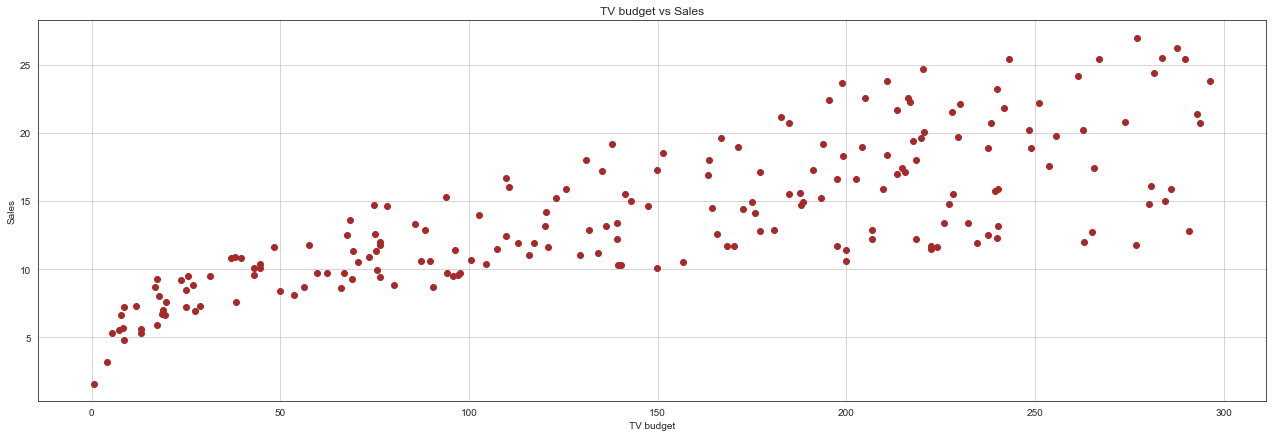

In [42]:
# Scatter plot
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(dataset.TV,dataset.sales,color="brown")
plt.grid(b=None)
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.show()

### Step 3. Pre-process and extract the features

In [43]:
# Normalize the data bring different scale values between 0 and 1
from sklearn import preprocessing
x = dataset.values                                    # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

,0,1,2,3
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882


### Step 4. Split the data for training and testing

In [44]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# The above returns data as numpy array

# The following returns records in random as pandas.core.frame.DataFrame
X = df.iloc[:,0].values.reshape((-1, 1))    # Budget spent on TV
Y = df.iloc[:,3].values                     # Sales
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size=0.2) 

### Step 5: Training phase (bulding the model) using Gradient Descent

##### Parameter initialization

In [45]:
# np.random.seed(13)
# number of iterations (epochs)
epoch = 1000
# learning rate
learn_rate = 0.001
# batch_size  
batch_size = 5

<b> Note: </b> Batch size should be between 1 to number of records (n) in x_train. If batch size is 
<ul>
  <li>1 - It is stochastic gradient descent. We randomly pick 1 training sample every iteration, perform forward pass, compute the error and immidiately adjust the parameters.</li>
  <li>2 to n/2 - It is called mini batch stochastic gradient descent. We randomly pick a batch training samples every iteration, perform forward pass, compute the error and immidiately adjust the parameters. </li>
  <li>n - It is called batch gradient descent (simple gradient decent). We use all the training samples in forward pass to calculate cumulitive error and than we adjust the parameter values</li>
</ul>

##### Gradient descent algorithm for 2 parameters

In [46]:
import numpy as np
from sklearn import linear_model   
SGDReg = linear_model.SGDRegressor(max_iter = epoch, tol = learn_rate)
# Stochastic gradient descent (batch size = 1 here)
SGDReg.fit(x_train, y_train)

# For mini batch gradient descent
# SGDReg.partial_fit(x_train, y_train)

SGDRegressor()

In [47]:
# perform the gradient descent search
m , b = SGDReg.intercept_, SGDReg.coef_
print("y = m x + b ==>  y = ",m," x + ",b)

y = m x + b ==>  y =  [0.35050108]  x +  [0.25899058]


##### Visualizing the model

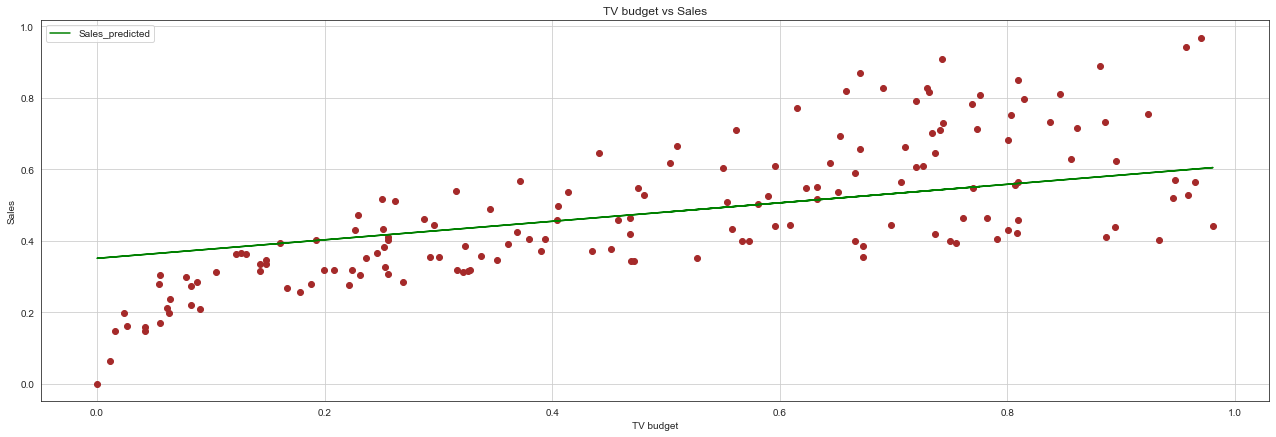

In [48]:
sns.set_style(style='white') 
fig = plt.figure(figsize = (22, 7)) 
plt.scatter(x_train, y_train, color="brown")
y_train_pred = SGDReg.predict(x_train)
plt.grid(b = None) 
plt.plot(x_train, y_train_pred, "g", label = "Sales_predicted")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show()

##### Plotting observed sale (x) and predicted sale (y) for training set

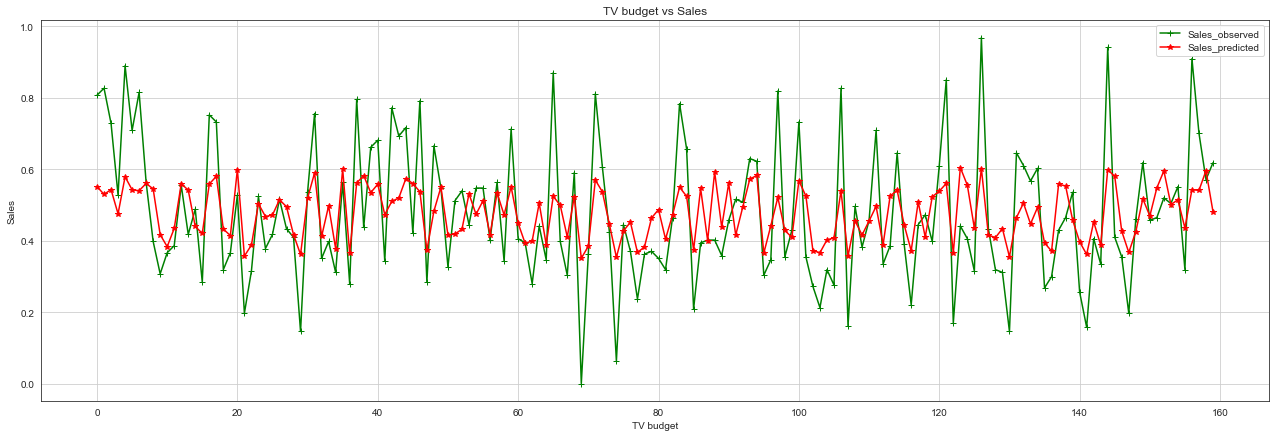

In [49]:
# Predicting the Test set results
x = np.arange(len(y_train_pred)) 
fig = plt.figure(figsize = (22, 7)) 
plt.plot(x, y_train, "g-+", label = "Sales_observed")
plt.plot(x, y_train_pred, "r-*", label = "Sales_predicted")
plt.grid(b = None) 
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot  

If the model has done good predictions, then the datapoints must be near around to horizontal line.

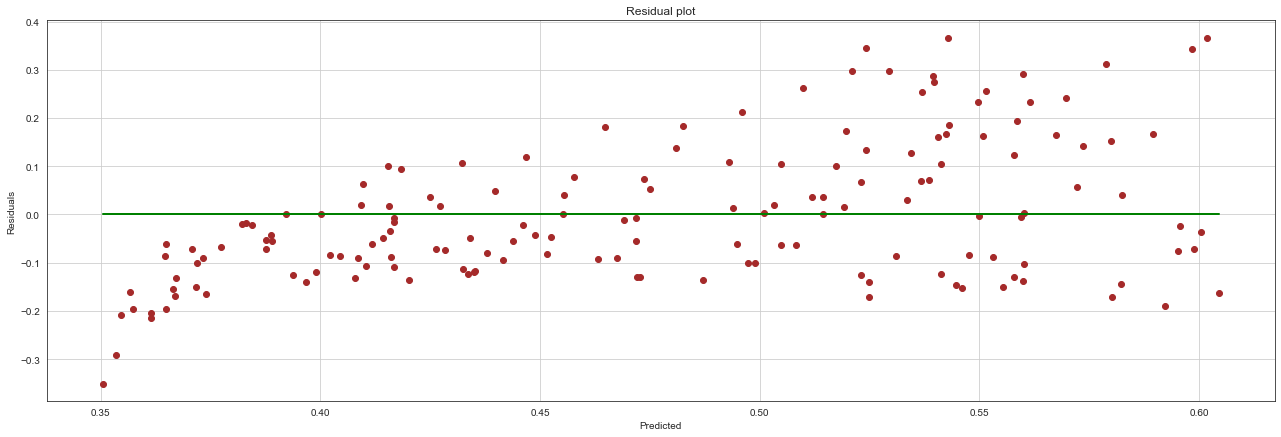

In [50]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_train-y_train_pred
zeros = y_train-y_train
plt.scatter(y_train_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_train_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot") 
plt.show()

### Different Error calculations to asses the model for training set

##### 1. Sum of Squared Error (SSE)

In [51]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Train_SSE = round(sum,2)
print("Sum of Squared Error (SSE) :",Train_SSE)

Sum of Squared Error (SSE) : 3.29


##### 2. Mean Squared Error (MSE)m

In [52]:
Train_MSE = round(Train_SSE/n,2)
print("Mean Squared Error (MSE) :",Train_MSE)

Mean Squared Error (MSE) : 0.02


##### 3. Root Mean Squared Error (RMSE)

In [53]:
Train_RMSE = round(np.sqrt(Train_MSE),2)
print("Root Mean Squared Error (RMSE) :",Train_RMSE)

Root Mean Squared Error (RMSE) : 0.14


##### 4. Mean Absolute Error (MAE)

In [54]:
sum = 0   
n = len(x_train)  
for i in range (0,n):   
  diff = y_train[i] - y_train_pred[i]   
  sum = sum + np.abs(diff)   
Train_MAE = round(sum/n,2)
print("Mean Absolute Error (MAE) :",Train_MAE)

Mean Absolute Error (MAE) : 0.12


##### 5. Mean Absolute Percentage Error (MAPE)

In [55]:
sum = 0   
n = len(x_train)  
for i in range (0,n): 
    if y_train[i] ==0:
        continue
    else:
        diff = (y_train[i] - y_train_pred[i])/y_train[i]
        sum = sum + np.abs(diff)  
Train_MAPE = round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Train_MAPE) 

Mean Absolute Percentage Error (MAPE) : 29.57


### Calculating R-Squred value (goodness of model) using SSE

In [56]:
from sklearn.metrics import r2_score
out = r2_score(y_train,y_train_pred)
Train_RS = round(out,2)*100
print("R-Squred value (goodness of model) for training set :",Train_RS,"%") 

R-Squred value (goodness of model) for training set : 43.0 %


### Step 6: Testing phase

In [57]:
# Predicting the Test set results
y_test_pred = SGDReg.predict(x_test) 

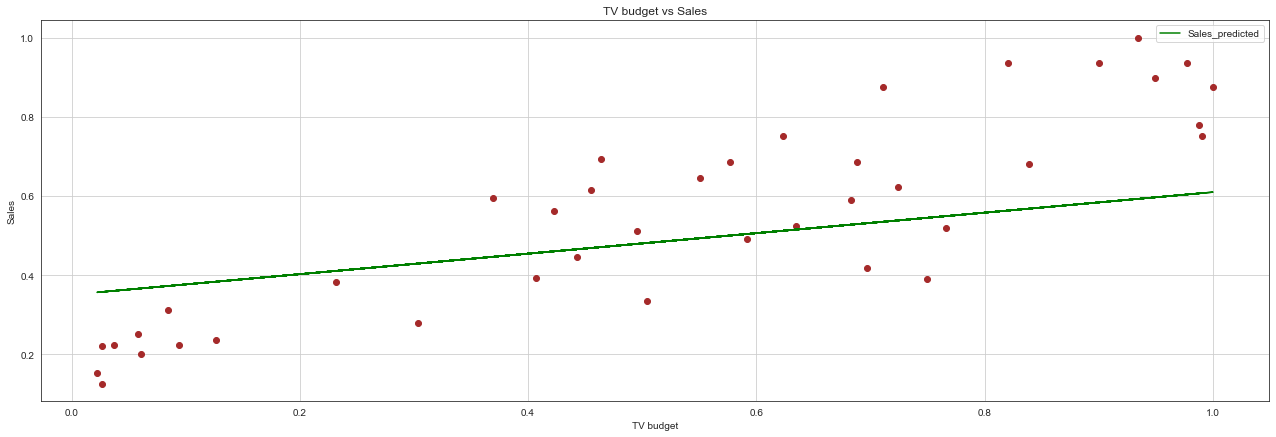

In [58]:
# Predicting the Test set results
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
plt.scatter(x_test,y_test,color="brown")
plt.grid(b=None) 
plt.plot(x_test,y_test_pred,"g",label="Sales_predicted")
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show()

##### Plotting observed sale (x) and predicted sale (y) for test set

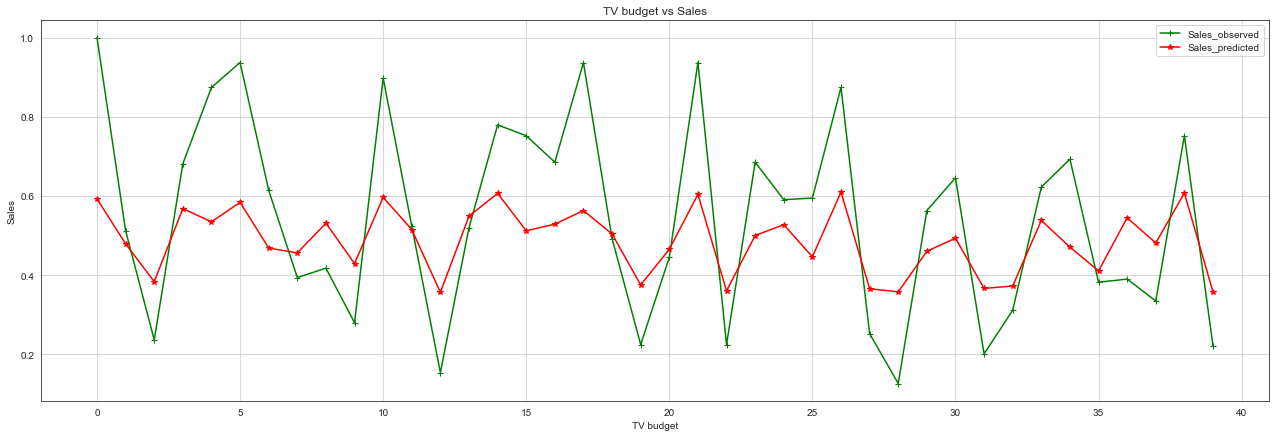

In [59]:
# Predicting the Test set results
x = np.arange(len(y_test_pred)) 
fig = plt.figure(figsize=(22,7)) 
plt.plot(x,y_test,"g-+",label="Sales_observed")
plt.plot(x,y_test_pred,"r-*",label="Sales_predicted")
plt.grid(b=None) 
plt.xlabel("TV budget")
plt.ylabel("Sales")
plt.title("TV budget vs Sales")
plt.legend()
plt.show() 

#### Residual (Error) plot  

If the model has done good predictions, then the datapoints must be near around to horizontal line.

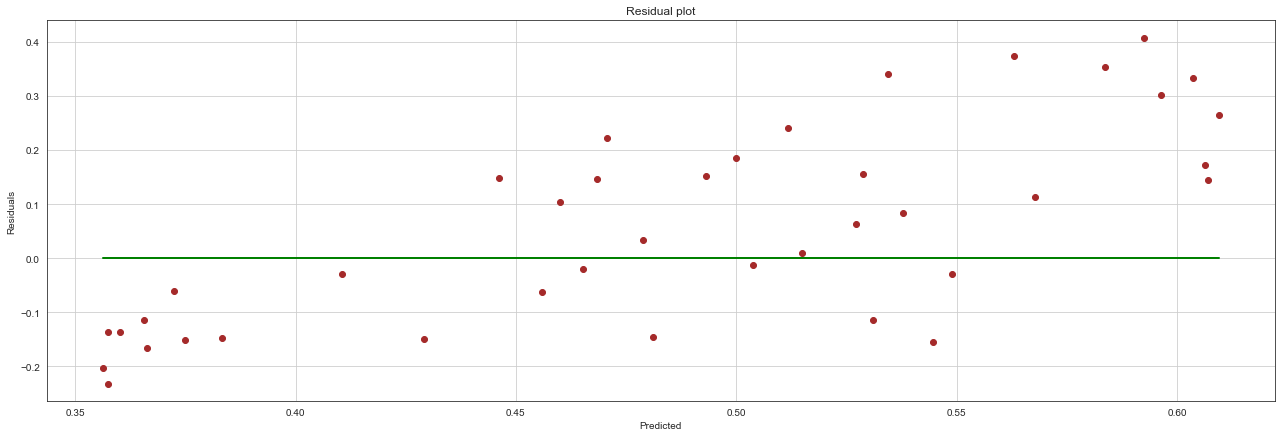

In [60]:
sns.set_style(style='white') 
fig = plt.figure(figsize=(22,7)) 
residuals = y_test-y_test_pred
zeros = y_test-y_test
plt.scatter(y_test_pred,residuals,color="brown")
plt.grid(b=None) 
plt.plot(y_test_pred,zeros,"g")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

#### Storing the outcome in a file

In [61]:
# Store the predicted value for sales in new column
dataset.rename(columns={'sales': 'observed_sales'}, inplace=True)
sales_data = dataset.iloc[:,0].values.reshape(-1, 1)
predicted_values = SGDReg.predict(sales_data)
dataset['predicted_sales'] = predicted_values
dataset.head()

,TV,radio,newspaper,observed_sales,predicted_sales
0,230.1,37.8,69.2,22.1,59.944233
1,44.5,39.3,45.1,10.4,11.875582
2,17.2,45.9,69.3,9.3,4.805139
3,151.5,41.3,58.5,18.5,39.587574
4,180.8,10.8,58.4,12.9,47.175998


In [62]:
# Write the above output input into new csv
# dataset.to_csv("8.Stochastic Gradient Descent.csv") 

### Different Error calculations to asses the model for the test set

##### 1. Sum of Squared Error (SSE)

In [63]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
Test_SSE = round(sum,2)
print("Sum of Squared Error (SSE) :",Test_SSE)

Sum of Squared Error (SSE) : 1.44


##### 2. Mean Squared Error (MSE)m

In [64]:
Test_MSE = round(Test_SSE/n,2)
print("Mean Squared Error (MSE) :",Test_MSE)

Mean Squared Error (MSE) : 0.04


##### 3. Root Mean Squared Error (RMSE)

In [65]:
Test_RMSE = round(np.sqrt(Test_MSE),2)
print("Root Mean Squared Error (RMSE) :",Test_RMSE)

Root Mean Squared Error (RMSE) : 0.2


##### 4. Mean Absolute Error (MAE)

In [66]:
sum = 0   
n = len(x_test)  
for i in range (0,n):   
  diff = y_test[i] - y_test_pred[i]   
  sum = sum + np.abs(diff)   
Test_MAE = round(sum/n,2)
print("Mean Absolute Error (MAE) :",Test_MAE)

Mean Absolute Error (MAE) : 0.16


##### 5. Mean Absolute Percentage Error (MAPE)

In [67]:
sum = 0   
n = len(x_test)  
for i in range (0,n): 
    if y_test[i] == 0:
        continue
    else:
        diff = (y_test[i] - y_test_pred[i])/y_test[i]
    sum = sum + np.abs(diff)  
Test_MAPE = round(sum/n*100,2)
print("Mean Absolute Percentage Error (MAPE) :",Test_MAPE) 

Mean Absolute Percentage Error (MAPE) : 36.67


### Calculating R-Squred value (goodness of model) using SSE

In [68]:
from sklearn.metrics import r2_score
out = r2_score(y_test,y_test_pred)
Test_RS = round(out,2)*100
print("R-Squred value (goodness of model) for training set :",Test_RS,"%") 

R-Squred value (goodness of model) for training set : 41.0 %


### Underfitting and overfitting observation

In [69]:
print("Error \t From training phase       From testing phase ")
print("===================================================")
print("SSE   \t\t",Train_SSE,"\t\t\t", Test_SSE)
print("MSE   \t\t",Train_MSE,"\t\t\t", Test_MSE)
print("RMSE   \t\t",Train_RMSE,"\t\t\t", Test_RMSE)
print("MAE   \t\t",Train_MAE,"\t\t\t", Test_MAE)
print("RS   \t\t",Train_RS,"\t\t\t", Test_RS)

Error 	 From training phase       From testing phase 
SSE   		 3.29 			 1.44
MSE   		 0.02 			 0.04
RMSE   		 0.14 			 0.2
MAE   		 0.12 			 0.16
RS   		 43.0 			 41.0
